**Loading Libraries**

In [25]:
# Loading libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**General Aesthetics and Color Palette**

In [7]:
# Configuring Seaborn and matplotlib
sns.set_theme(style="ticks", rc={"grid.color": "gray", "font.family": "serif"})
sns.set_palette("Paired")

**Loading and viewing the dataset**

In [8]:
# Defining the file path
file_path = 'Labor_force_by_level_of_education.csv'
data = pd.read_csv(file_path)

In [9]:
# Checking the structure & Exploring the dataset
print("\nDataset Info:")
print(data.info())
print("First few rows of the dataset:")
print(data.head())
print("\nBasic Statistics:")
print(data.describe(include='all'))


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 6 columns):
 #   Column                                                                                              Non-Null Count  Dtype  
---  ------                                                                                              --------------  -----  
 0   Economy                                                                                             217 non-null    object 
 1   Year                                                                                                217 non-null    int64  
 2   Economy Code                                                                                        217 non-null    object 
 3   Gender Gap (Female - Male)                                                                          171 non-null    float64
 4   Labor force with basic education, female (% of female working-age population with basic education)  17

**Statistical Analysis**

In [12]:
# Generating Statistical Summary
def generate_statistical_analysis(dataframe):
    """
    Generates descriptive statistics for the dataset.

    Parameters:
        dataframe (pd.DataFrame): The input DataFrame.

    Returns:
        pd.DataFrame: Descriptive statistics including missing value counts.
    """
    stats = dataframe.describe(include='all').T
    stats['missing'] = dataframe.isnull().sum()
    stats['dtype'] = dataframe.dtypes
    return stats

In [13]:
# Displaying statistical summary
print("\nStatistical Summary:")
stat_summary = generate_statistical_analysis(data)
print(stat_summary)


Statistical Summary:
                                                    count unique          top  \
Economy                                               217    217  Afghanistan   
Year                                                217.0    NaN          NaN   
Economy Code                                          217    217          AFG   
Gender Gap (Female - Male)                          171.0    NaN          NaN   
Labor force with basic education, female (% of ...  171.0    NaN          NaN   
Labor force with basic education, male (% of ma...  171.0    NaN          NaN   

                                                   freq         mean  \
Economy                                               1          NaN   
Year                                                NaN  2021.612903   
Economy Code                                          1          NaN   
Gender Gap (Female - Male)                          NaN   -21.901076   
Labor force with basic education, female (% of ...

**Data Preprocessing**

In [14]:
# Cleaning the Data
# Dropping rows with NaN in critical columns
important_columns = [
    'Gender Gap (Female - Male)',
    'Labor force with basic education, female (% of female working-age population with basic education)',
    'Labor force with basic education, male (% of male working-age population with basic education)'
]
data_cleaned = data.dropna(subset=important_columns).reset_index(drop=True)

In [15]:
# Ensuring all numeric columns are in numeric format
for col in data_cleaned.select_dtypes(include=['float64', 'int64']):
    data_cleaned[col] = pd.to_numeric(data_cleaned[col], errors='coerce')

In [16]:
# Previewing the cleaned data
print("\nCleaned Data Preview:")
print(data_cleaned.head())


Cleaned Data Preview:
       Economy  Year Economy Code  Gender Gap (Female - Male)  \
0  Afghanistan  2021          AFG                     -56.451   
1      Albania  2019          ALB                     -15.032   
2      Algeria  2017          DZA                     -62.450   
3       Angola  2021          AGO                      -3.584   
4    Argentina  2023          ARG                     -27.389   

   Labor force with basic education, female (% of female working-age population with basic education)  \
0                                             18.875                                                    
1                                             48.268                                                    
2                                             11.510                                                    
3                                             83.757                                                    
4                                             35.972         

In [17]:
# Saving the cleaned data
cleaned_file_path = 'Cleaned_Labor_Force_Data.csv'
data_cleaned.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned dataset saved to: {cleaned_file_path}")


Cleaned dataset saved to: Cleaned_Labor_Force_Data.csv


In [19]:
# Creating & previewing a new column for the absolute gender gap
data_cleaned['Absolute Gender Gap'] = data_cleaned['Gender Gap (Female - Male)'].abs()
print("\nCleaned Data with New Feature Preview:")
print(data_cleaned.head())


Cleaned Data with New Feature Preview:
       Economy  Year Economy Code  Gender Gap (Female - Male)  \
0  Afghanistan  2021          AFG                     -56.451   
1      Albania  2019          ALB                     -15.032   
2      Algeria  2017          DZA                     -62.450   
3       Angola  2021          AGO                      -3.584   
4    Argentina  2023          ARG                     -27.389   

   Labor force with basic education, female (% of female working-age population with basic education)  \
0                                             18.875                                                    
1                                             48.268                                                    
2                                             11.510                                                    
3                                             83.757                                                    
4                                           

**Statistical Summary**

In [20]:
# Generating Statistical Analysis
def generate_statistical_analysis(dataframe):
    """
    Generates descriptive statistics for the dataset.
    """
    stats = dataframe.describe(include='all').T
    stats['missing'] = dataframe.isnull().sum()
    stats['dtype'] = dataframe.dtypes
    return stats
    
# Generating Statistical Summary
stat_summary = generate_statistical_analysis(data_cleaned)
print("\nStatistical Summary:")
print(stat_summary)


Statistical Summary:
                                                    count unique          top  \
Economy                                               171    171  Afghanistan   
Year                                                171.0    NaN          NaN   
Economy Code                                          171    171          AFG   
Gender Gap (Female - Male)                          171.0    NaN          NaN   
Labor force with basic education, female (% of ...  171.0    NaN          NaN   
Labor force with basic education, male (% of ma...  171.0    NaN          NaN   
Absolute Gender Gap                                 171.0    NaN          NaN   

                                                   freq         mean  \
Economy                                               1          NaN   
Year                                                NaN  2021.239766   
Economy Code                                          1          NaN   
Gender Gap (Female - Male)               

In [21]:
# Saving Statistical Summary as CSV
stat_summary.to_csv("statistical_summary.csv", index=False)

**Exploratory Data Analysis (EDA)**

In [54]:
# Calculating statistics for the 'Gender Gap (Female - Male)' column
gender_gap_mean = data_cleaned['Gender Gap (Female - Male)'].mean()
gender_gap_median = data_cleaned['Gender Gap (Female - Male)'].median()
gender_gap_std_dev = data_cleaned['Gender Gap (Female - Male)'].std()
gender_gap_variance = data_cleaned['Gender Gap (Female - Male)'].var()
gender_gap_min = data_cleaned['Gender Gap (Female - Male)'].min()
gender_gap_max = data_cleaned['Gender Gap (Female - Male)'].max()
gender_gap_skewness = data_cleaned['Gender Gap (Female - Male)'].skew()
gender_gap_kurtosis = data_cleaned['Gender Gap (Female - Male)'].kurt()

# Printing results
print("Gender Gap (Female - Male) - Mean:", gender_gap_mean)
print("Gender Gap (Female - Male) - Median:", gender_gap_median)
print("Gender Gap (Female - Male) - Standard Deviation:", gender_gap_std_dev)
print("Gender Gap (Female - Male) - Variance:", gender_gap_variance)
print("Gender Gap (Female - Male) - Minimum:", gender_gap_min)
print("Gender Gap (Female - Male) - Maximum:", gender_gap_max)
print("Gender Gap (Female - Male) - Skewness:", gender_gap_skewness)
print("Gender Gap (Female - Male) - Kurtosis:", gender_gap_kurtosis)

Gender Gap (Female - Male) - Mean: -21.901076023391813
Gender Gap (Female - Male) - Median: -17.613
Gender Gap (Female - Male) - Standard Deviation: 14.654703420446468
Gender Gap (Female - Male) - Variance: 214.7603323412454
Gender Gap (Female - Male) - Minimum: -64.644
Gender Gap (Female - Male) - Maximum: 2.929
Gender Gap (Female - Male) - Skewness: -1.0279140811610232
Gender Gap (Female - Male) - Kurtosis: 0.5837348070404311


**Data Visualisation**

**1. Bar Plot**

In [23]:
def plot_horizontal_bar_specific_countries(data, countries):
    """
    Creates a horizontal bar plot for labor force participation by gender for specified countries.

    Parameters:
        data (pd.DataFrame): The input dataset.
        countries (list): List of country names to include in the plot.
    """
    # Filtering the dataset for the specified countries
    selected_countries = data[data['Economy'].isin(countries)]

    # Ensuring there are matching countries
    if selected_countries.empty:
        print("Error: None of the specified countries are found in the dataset.")
        return

    # Extracting relevant columns
    economy = selected_countries['Economy']
    female = selected_countries['Labor force with basic education, female (% of female working-age population with basic education)']
    male = selected_countries['Labor force with basic education, male (% of male working-age population with basic education)']
    years = selected_countries['Year']

    # Defining bar width and positions
    bar_width = 0.25
    index = np.arange(len(economy))
    
    plt.figure(figsize=(12, 6))
    plt.barh(index, female, bar_width, color="#FFCC66", label="Female")  # Light orange
    plt.barh(index + bar_width, male, bar_width, color="#9966CC", label="Male")  # Purple
    for i in range(len(economy)):
        plt.text(female.iloc[i] + 1, i, f"{female.iloc[i]:.0f}% ({int(years.iloc[i])})", va="center", fontsize=9)
        plt.text(male.iloc[i] + 1, i + bar_width, f"{male.iloc[i]:.0f}% ({int(years.iloc[i])})", va="center", fontsize=9)

    plt.yticks(index + bar_width / 2, economy, fontsize=10)
    plt.xlabel("Participation (%)", fontsize=12)
    plt.title("Labor Force Participation by Gender (Selected Countries)", fontsize=14, fontweight="bold")
    plt.legend(title="Gender", loc="lower right", fontsize=10)
    plt.grid(axis="x", linestyle="--", alpha=0.3)
    plt.tight_layout()
    plt.savefig("labor_force_countries.png", dpi=300)  
    plt.show()

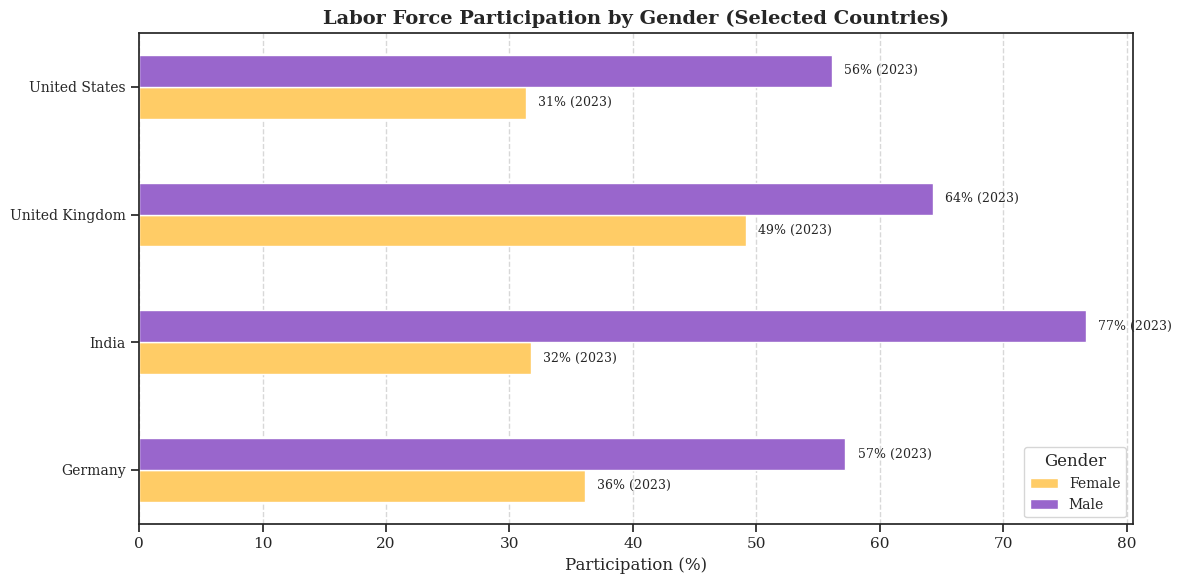

In [26]:
# Specifying the list of countries to plot
countries = ["India", "United States", "Germany", "United Kingdom"]

# Calling the function
plot_horizontal_bar_specific_countries(data_cleaned, countries)

**2. Heatmap of correlation matrix**

In [34]:
def plot_correlation_heatmap(data, column_map):
    """
    Plots a correlation heatmap for numeric columns in the dataset.

    Parameters:
        data (pd.DataFrame): The dataset to analyze.
        column_map (dict): Dictionary mapping old column names to readable names.
    """
    # Rename columns for better readability
    data = data.rename(columns=column_map)
    corr = data.corr(numeric_only=True)
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.set_style("white")
    plt.figure(figsize=(8, 6), dpi=144)
    sns.heatmap(corr,mask=mask,cmap="plasma", vmin=-1, vmax=1, annot=True, fmt=".2f", cbar_kws={'shrink': 0.8})
    plt.title("Heatmap of Correlation Matrix", fontsize=14)
    plt.tight_layout()
    plt.savefig("correlation_heatmap_plasma.png", dpi=300)
    plt.show()

In [35]:
column_map = {
    'Labor force with basic education, female (% of female working-age population with basic education)': 'Female Education',
    'Labor force with basic education, male (% of male working-age population with basic education)': 'Male Education',
    'Labor force with basic education, total (% of total working-age population with basic education)': 'Total Education',
    'Gender Gap (Female - Male)': 'Gender Gap',
    'Year': 'Year'
}

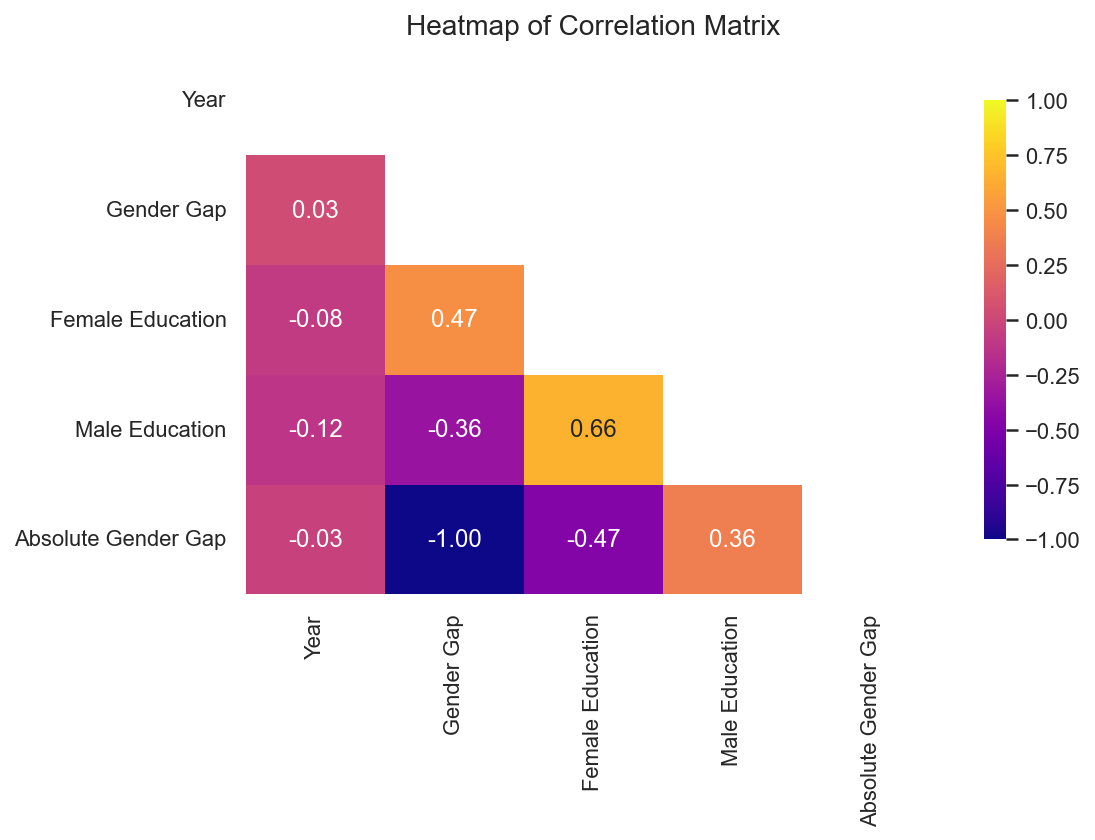

In [36]:
# Call the function with the cleaned dataset
plot_correlation_heatmap(data_cleaned, column_map)


**3. Pair Plot**

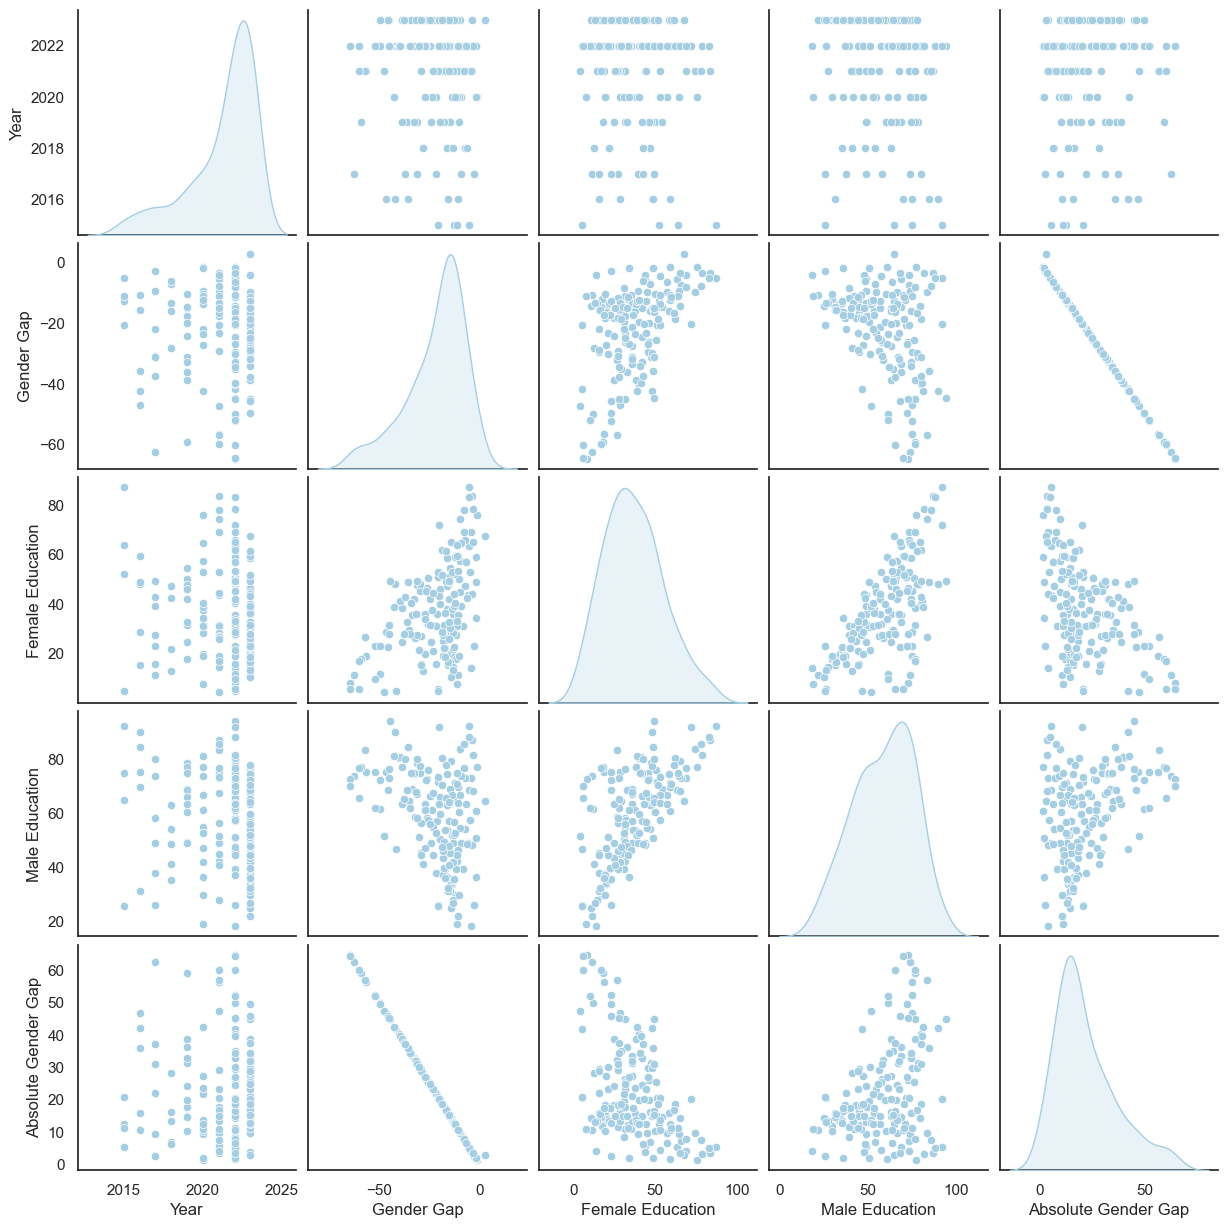

In [38]:
sns.pairplot(data_cleaned.rename(columns=column_map), diag_kind="kde", height=2.5)
plt.savefig("pairwise_scatterplots.png", dpi=300)
plt.show()

**4. Scatter Plot**

In [42]:
def plot_scatter_labor_force(data):
    """
    Creates a scatter plot comparing female and male labor force participation
    with two distinct colors.
    """
    plt.figure(figsize=(8, 4))
    
    # Scatter plot for Female participation
    plt.scatter(data.index, data['Labor force with basic education, female (% of female working-age population with basic education)'], 
        color='crimson', label='Female', s=50, alpha=0.8)
    
    # Scatter plot for Male participation
    plt.scatter(data.index, data['Labor force with basic education, male (% of male working-age population with basic education)'], 
        color='indigo',label='Male', s=50, alpha=0.8)
    
    plt.xlabel("Countries (indexed)", fontsize=12)
    plt.ylabel("Labor Force Participation (%)", fontsize=12)
    plt.title("Female vs Male Labor Force Participation", fontsize=14)
    plt.legend()
    plt.tight_layout()
    plt.grid(alpha=0.3)
    plt.savefig("scatter_plot_colors.png", dpi=300)
    plt.show()

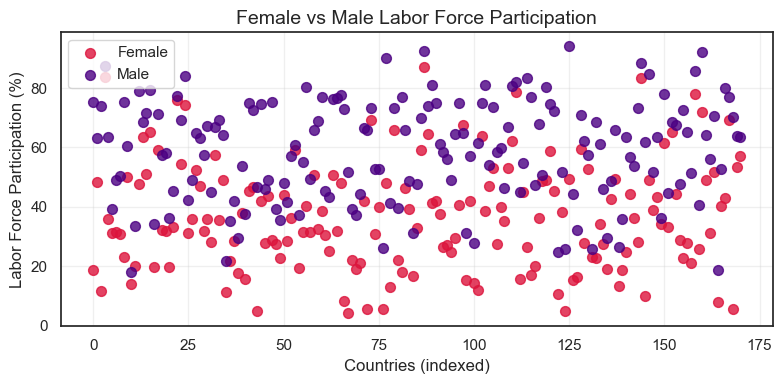

In [43]:
# Calling the function
plot_scatter_labor_force(data_cleaned)

**5. Histogram [Distribution]**

In [44]:
def plot_gender_gap_distribution(data, color="teal"):
    """
    Plots the distribution of the gender gap.
    
    Parameters:
        data (pd.DataFrame): The dataset containing the 'Gender Gap (Female - Male)' column.
        color (str): The color of the histogram.
    """
    plt.figure(figsize=(8, 4))
    sns.histplot(data['Gender Gap (Female - Male)'], bins=20, kde=True, color=color, edgecolor='black' )
    plt.title("Distribution of Gender Gap (Female - Male)", fontsize=12)
    plt.xlabel("Gender Gap (%)", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.text(data['Gender Gap (Female - Male)'].mean(), 10, "Maximun average gender gap.", fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
    plt.tight_layout()
    plt.savefig("gender_gap_distribution.png", dpi=300)
    plt.show()

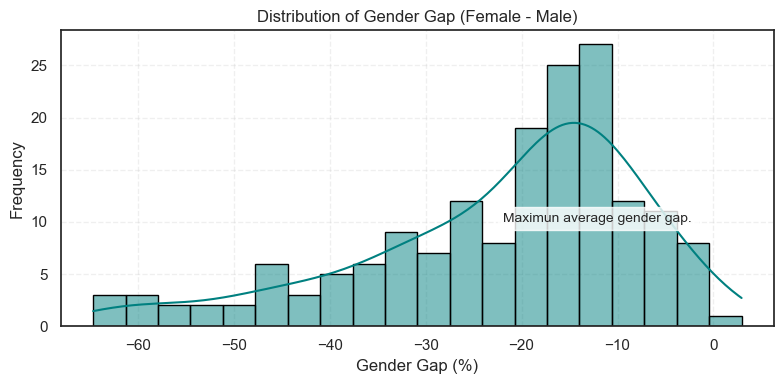

In [45]:
#Calling the function
plot_gender_gap_distribution(data_cleaned, color="Teal")

**6. Box Plot**

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_gender_gap_by_year(data):
    """
    Plots the gender gap distribution by year using a box plot.

    Parameters:
        data (pd.DataFrame): The dataset containing 'Gender Gap (Female - Male)' and 'Year' columns.
    """
    # Generate a unique palette with enough colors for each year
    unique_years = data['Year'].nunique()
    palette = sns.color_palette("viridis", n_colors=unique_years)

    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Year', y='Gender Gap (Female - Male)', data=data, palette=palette, width=0.6)
    plt.title("Gender Gap Distribution by Year", fontsize=14 )
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Gender Gap (%)", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.savefig("gender_gap_by_year_fixed.png", dpi=300)
    plt.show()

C:\Users\latas\AppData\Local\Temp\ipykernel_45256\1726623466.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Year', y='Gender Gap (Female - Male)', data=data, palette=palette, width=0.6)


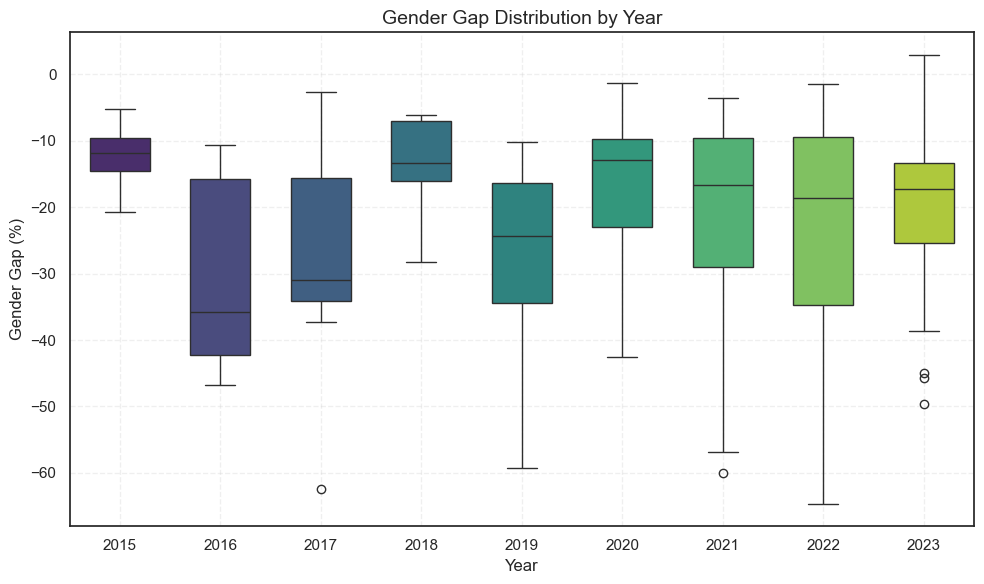

In [49]:
# Calling the function
plot_gender_gap_by_year(data_cleaned)

**6(A). Subplot of Histogram & Box Plot**

In [50]:
def create_side_by_side_plots(data):
    """
    Creates a distribution plot for 'Gender Gap' and a box plot for 
    both Male and Female Labor Force Participation side by side,
    and saves the figure.
    """
    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    plt.title('Gender Gap Distribution', fontsize=14)
    sns.histplot(data['Gender Gap (Female - Male)'], kde=True, color='purple')
    plt.subplot(1, 2, 2)
    plt.title('Labor Force Participation (Male vs Female)', fontsize=14)
    
    # Prepare data for comparison
    comparison_data = data[[ 'Labor force with basic education, female (% of female working-age population with basic education)',
            'Labor force with basic education, male (% of male working-age population with basic education)']].rename(
        columns={ 'Labor force with basic education, female (% of female working-age population with basic education)': 'Female',
            'Labor force with basic education, male (% of male working-age population with basic education)': 'Male' }
    ).melt(var_name='Gender', value_name='Participation')
    
    sns.boxplot(x='Gender', y='Participation', data=comparison_data, palette=['coral', 'skyblue'])
    plt.tight_layout()
    plt.savefig("side_by_side_plots.png", dpi=300)
    plt.show()

C:\Users\latas\AppData\Local\Temp\ipykernel_45256\3261996991.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Participation', data=comparison_data, palette=['coral', 'skyblue'])


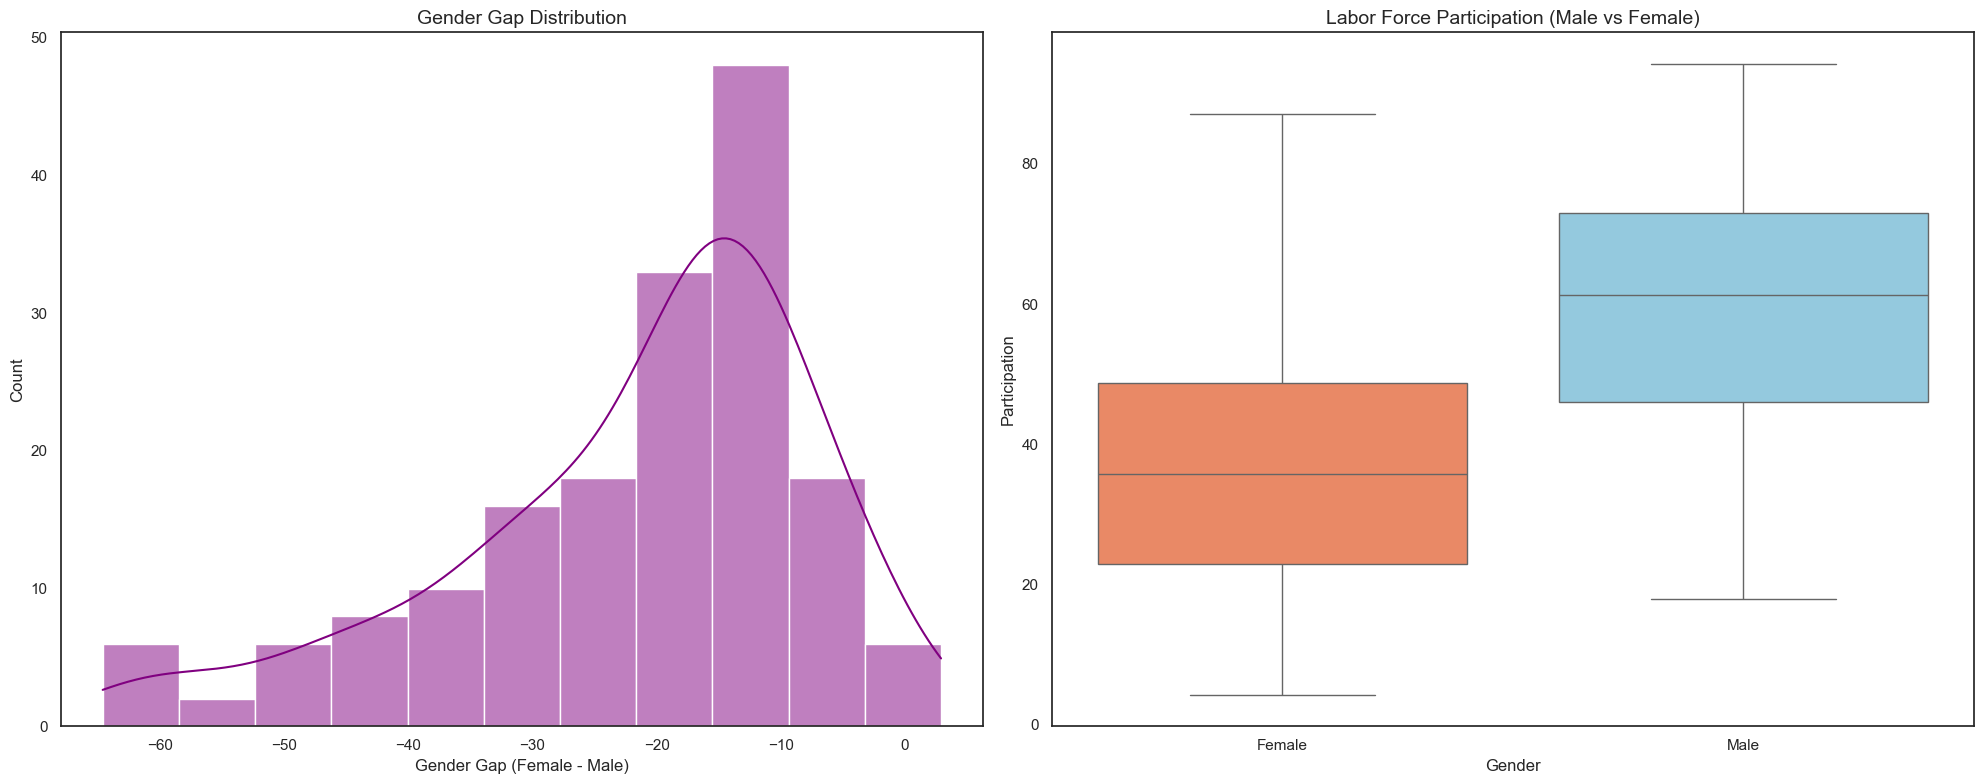

In [51]:
# Call the function with your cleaned dataset
create_side_by_side_plots(data_cleaned)

**7. Timeline Plot**

In [52]:
def plot_participation_timeline(data):
    """
    Creates a timeline plot showing male and female labor force participation over the years.

    Parameters:
        data (pd.DataFrame): The dataset containing 'Year', 
                             'Labor force with basic education, male (% of male working-age population with basic education)',
                             and 'Labor force with basic education, female (% of female working-age population with basic education)'.
    """
    plt.figure(figsize=(10, 6), dpi=300)
    
    # Plot lines for male and female participation
    sns.lineplot(x='Year', y='Labor force with basic education, male (% of male working-age population with basic education)',data=data,
        label='Male Participation', color='blue', marker='o' )
    sns.lineplot(x='Year', y='Labor force with basic education, female (% of female working-age population with basic education)',data=data,
        label='Female Participation', color='orange', marker='o' )
    plt.title("Timeline of Male and Female Labor Force Participation", fontsize=16, fontweight='bold')
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Participation (%)", fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title="Gender", loc="upper left", fontsize=10)
    plt.tight_layout()
    plt.savefig("timeline_participation_male_female.png", dpi=300)
    plt.show()

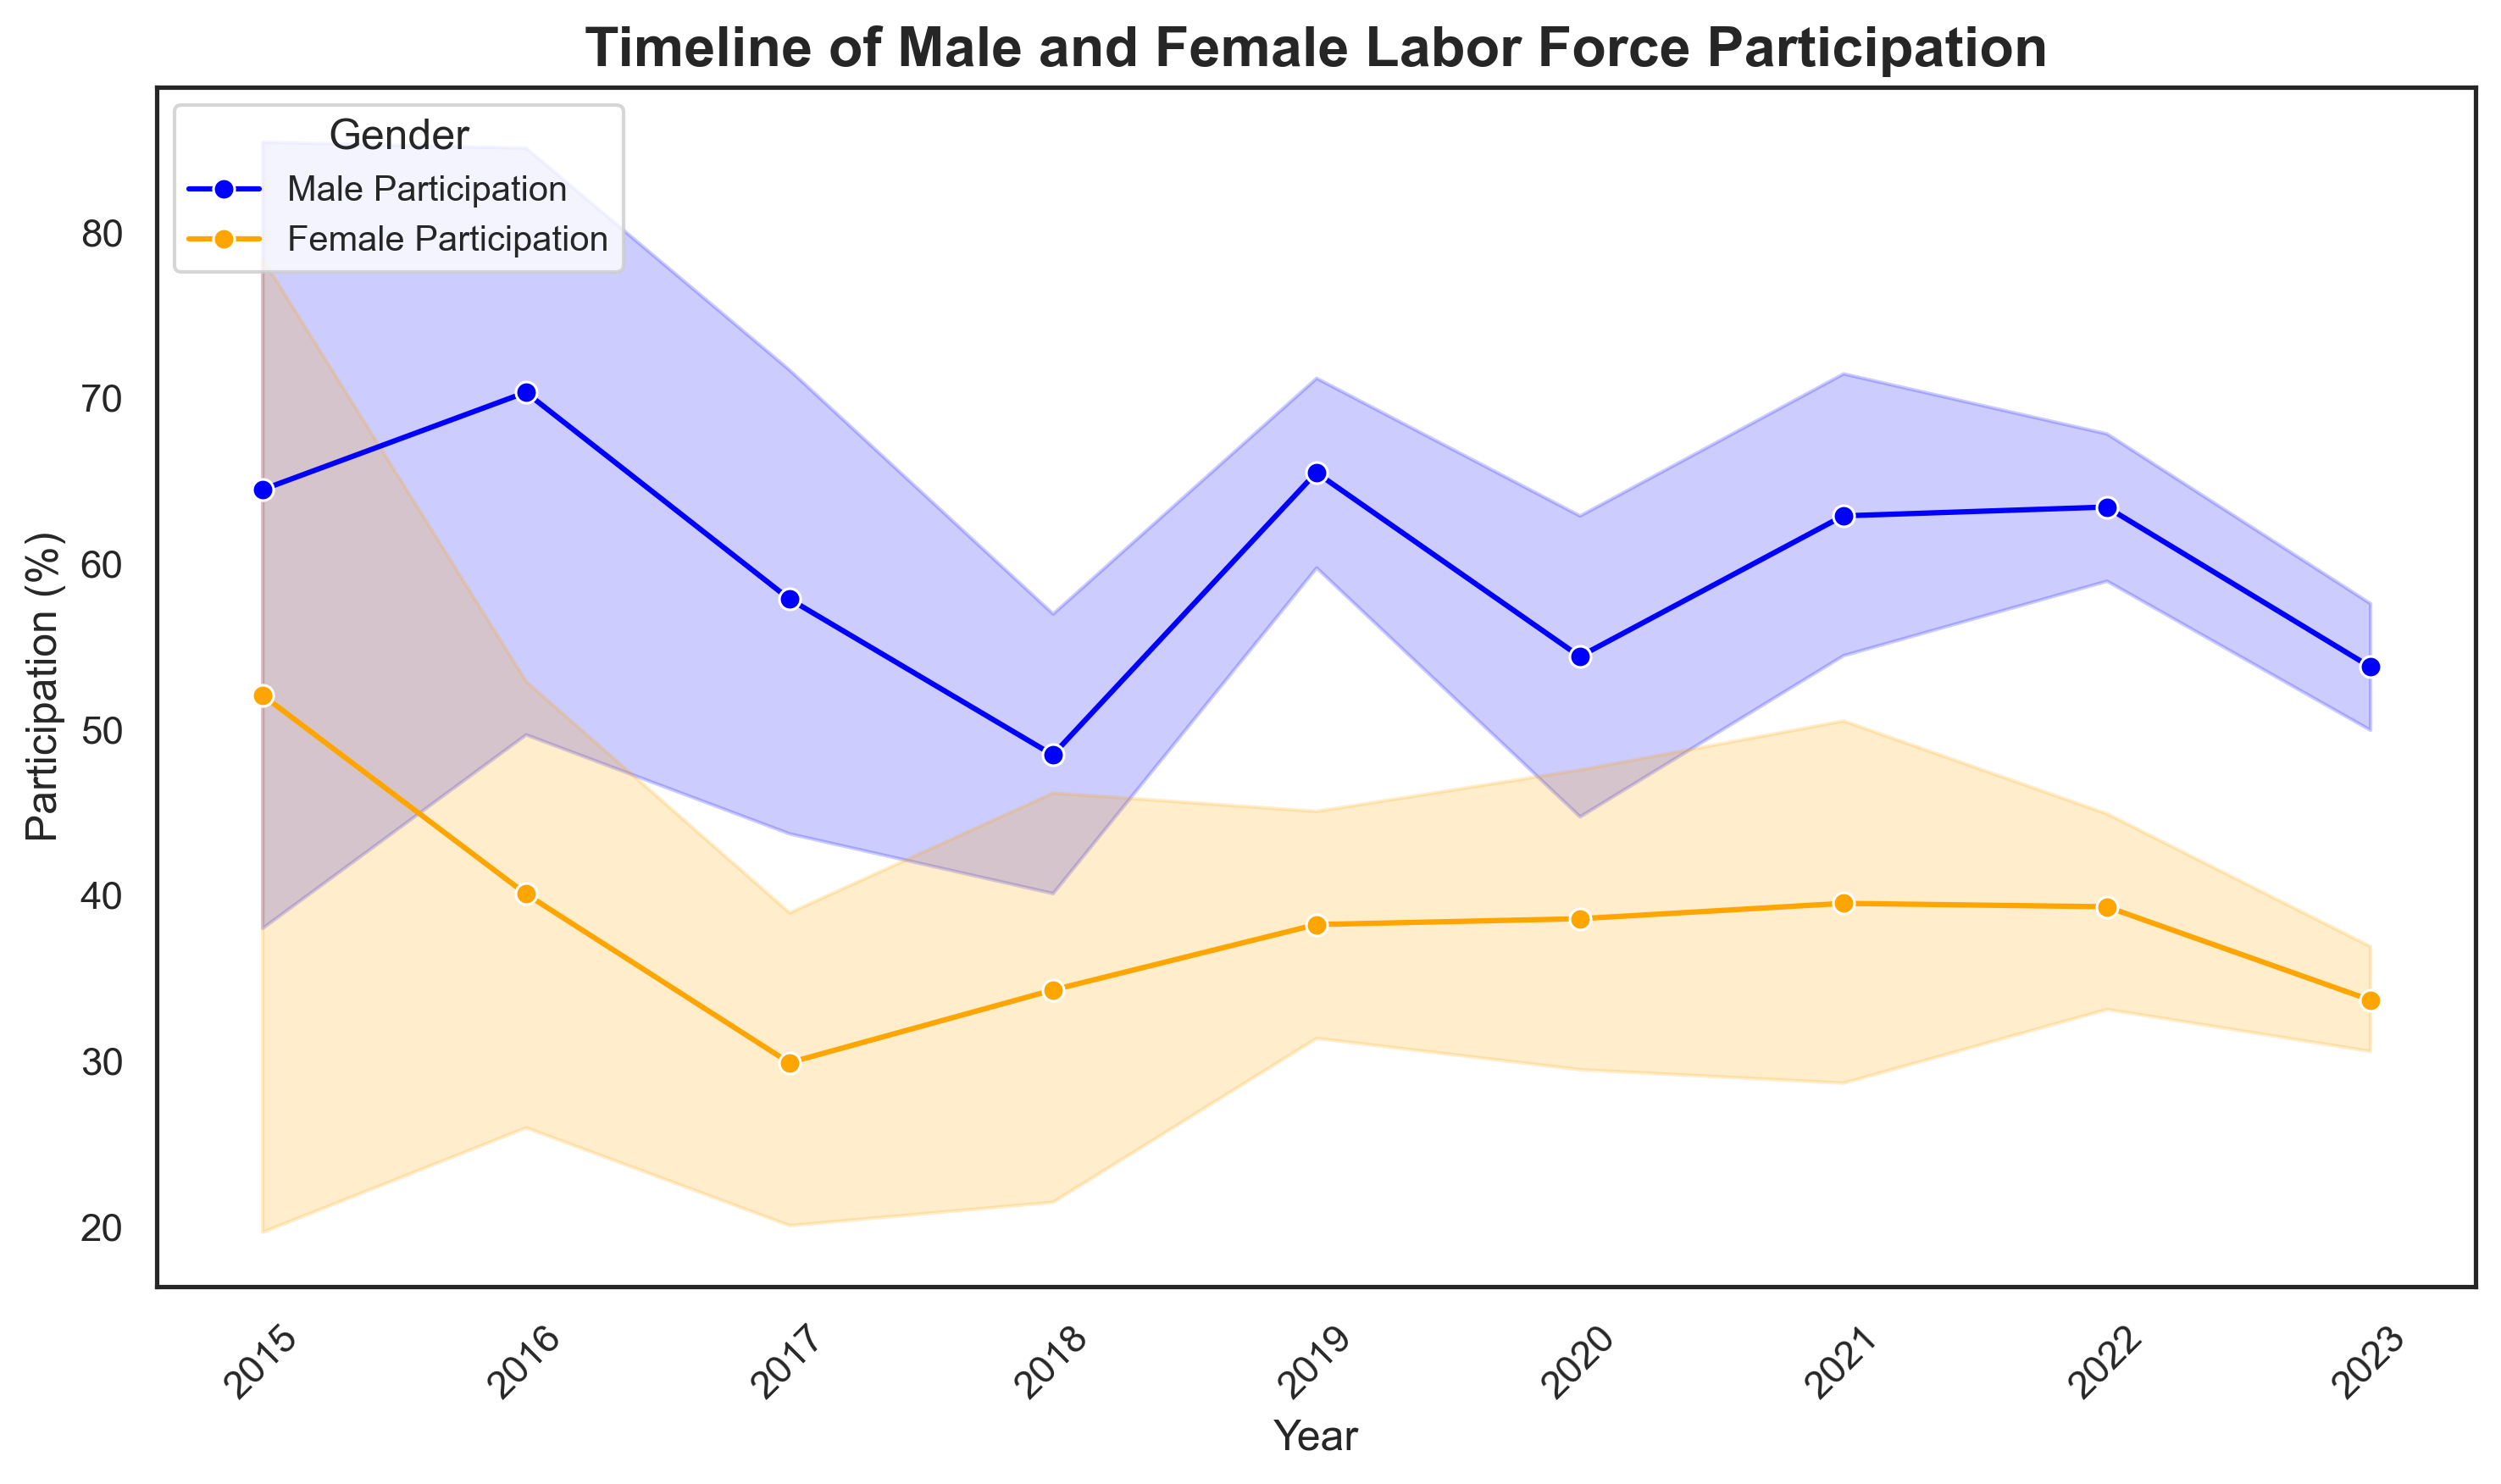

In [53]:
# Calling the function 
plot_participation_timeline(data_cleaned)